In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [6]:
# Import the requests library.
import requests

# Import the API key. Config file should be in same folder as this API_practice file.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | nome
Processing Record 5 of Set 1 | vao
Processing Record 6 of Set 1 | vostok
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | praia da vitoria
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | pirapemas
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | trairi
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | aragarcas
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | sorvag
City not found. Skipping...
Processing Record 20 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 21 of Set 1 | norm

Processing Record 33 of Set 4 | geraldton
Processing Record 34 of Set 4 | deleni
Processing Record 35 of Set 4 | altay
Processing Record 36 of Set 4 | christiana
Processing Record 37 of Set 4 | lebu
Processing Record 38 of Set 4 | matay
Processing Record 39 of Set 4 | faanui
Processing Record 40 of Set 4 | pahrump
Processing Record 41 of Set 4 | ksenyevka
City not found. Skipping...
Processing Record 42 of Set 4 | harnosand
Processing Record 43 of Set 4 | puerto quijarro
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | henties bay
Processing Record 46 of Set 4 | kroya
Processing Record 47 of Set 4 | lewisporte
Processing Record 48 of Set 4 | eyl
Processing Record 49 of Set 4 | bagdarin
Processing Record 50 of Set 4 | pudozh
Processing Record 1 of Set 5 | dianopolis
City not found. Skipping...
Processing Record 2 of Set 5 | mandan
Processing Record 3 of Set 5 | mackay
Processing Record 4 of Set 5 | cabedelo
Processing Record 5 of Set 5 | yellowknife
Processing Recor

Processing Record 28 of Set 8 | kalomo
City not found. Skipping...
Processing Record 29 of Set 8 | bar harbor
Processing Record 30 of Set 8 | hirara
Processing Record 31 of Set 8 | carolina
Processing Record 32 of Set 8 | moron
Processing Record 33 of Set 8 | abaza
Processing Record 34 of Set 8 | sibolga
Processing Record 35 of Set 8 | cameron park
Processing Record 36 of Set 8 | warqla
City not found. Skipping...
Processing Record 37 of Set 8 | saint george
Processing Record 38 of Set 8 | constitucion
Processing Record 39 of Set 8 | tombouctou
Processing Record 40 of Set 8 | san cristobal
Processing Record 41 of Set 8 | voitsberg
Processing Record 42 of Set 8 | mehamn
Processing Record 43 of Set 8 | lagos
Processing Record 44 of Set 8 | asau
Processing Record 45 of Set 8 | hofn
Processing Record 46 of Set 8 | balakhninskiy
Processing Record 47 of Set 8 | kattivakkam
Processing Record 48 of Set 8 | jalu
Processing Record 49 of Set 8 | rengali
Processing Record 50 of Set 8 | wakkanai
Pr

Processing Record 17 of Set 12 | tazmalt
Processing Record 18 of Set 12 | richards bay
Processing Record 19 of Set 12 | bhainsdehi
Processing Record 20 of Set 12 | komsomolskiy
Processing Record 21 of Set 12 | djenne
Processing Record 22 of Set 12 | bolotnoye
Processing Record 23 of Set 12 | znamenskoye
Processing Record 24 of Set 12 | ixtapa
Processing Record 25 of Set 12 | hit
Processing Record 26 of Set 12 | la ronge
Processing Record 27 of Set 12 | iralaya
Processing Record 28 of Set 12 | veraval
Processing Record 29 of Set 12 | santa ana
Processing Record 30 of Set 12 | revelstoke
Processing Record 31 of Set 12 | jiazi
Processing Record 32 of Set 12 | nishihara
Processing Record 33 of Set 12 | panalingaan
Processing Record 34 of Set 12 | ola
Processing Record 35 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 36 of Set 12 | mildura
Processing Record 37 of Set 12 | marcona
City not found. Skipping...
Processing Record 38 of Set 12 | vanersborg
Processin

In [10]:
# Tallying the number of cities in the city_data array to make sure its > 500.
len(city_data)

555

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,39.20,81,75,23.02,CA,2022-07-14 15:50:17
1,Ponta Do Sol,32.6667,-17.1000,80.71,62,3,8.03,PT,2022-07-14 15:48:37
2,Busselton,-33.6500,115.3333,59.63,73,83,20.85,AU,2022-07-14 15:50:18
3,Nome,64.5011,-165.4064,46.47,100,100,0.00,US,2022-07-14 15:50:18
4,Vao,-22.6667,167.4833,71.04,65,12,25.10,NC,2022-07-14 15:50:19
5,Vostok,46.4856,135.8833,58.75,93,100,5.17,RU,2022-07-14 15:49:00
6,Hamilton,39.1834,-84.5333,83.62,57,20,8.05,US,2022-07-14 15:50:19
7,Praia Da Vitoria,38.7333,-27.0667,77.25,78,75,15.26,PT,2022-07-14 15:49:29
8,Khatanga,71.9667,102.5000,42.60,91,100,4.70,RU,2022-07-14 15:48:45
9,Albany,42.6001,-73.9662,78.58,63,6,6.35,US,2022-07-14 15:49:09


In [12]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-07-14 15:50:17,69.4541,-133.0374,39.20,81,75,23.02
1,Ponta Do Sol,PT,2022-07-14 15:48:37,32.6667,-17.1000,80.71,62,3,8.03
2,Busselton,AU,2022-07-14 15:50:18,-33.6500,115.3333,59.63,73,83,20.85
3,Nome,US,2022-07-14 15:50:18,64.5011,-165.4064,46.47,100,100,0.00
4,Vao,NC,2022-07-14 15:50:19,-22.6667,167.4833,71.04,65,12,25.10
5,Vostok,RU,2022-07-14 15:49:00,46.4856,135.8833,58.75,93,100,5.17
6,Hamilton,US,2022-07-14 15:50:19,39.1834,-84.5333,83.62,57,20,8.05
7,Praia Da Vitoria,PT,2022-07-14 15:49:29,38.7333,-27.0667,77.25,78,75,15.26
8,Khatanga,RU,2022-07-14 15:48:45,71.9667,102.5000,42.60,91,100,4.70
9,Albany,US,2022-07-14 15:49:09,42.6001,-73.9662,78.58,63,6,6.35


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

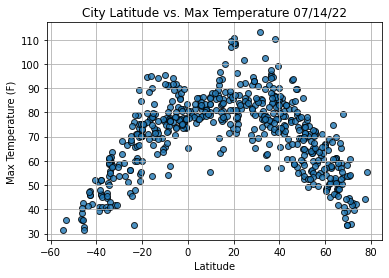

In [15]:
# Scatter plot needs current date in the title.
# To get current date, need to import time module (a standard module so no need to install)
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties. Time will appear like a datetime stamp
# so should convert it to string format method: strftime()
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

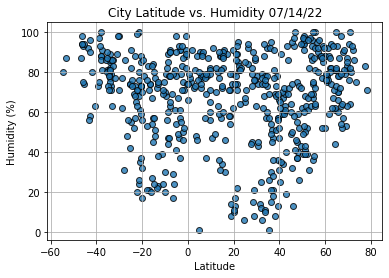

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties. Time will appear like a datetime stamp
# so should convert it to string format method: strftime()
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

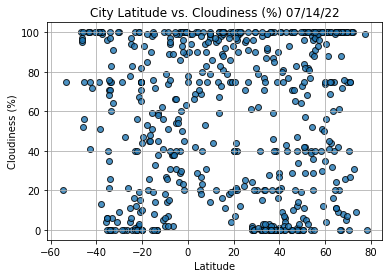

In [17]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties. Time will appear like a datetime stamp
# so should convert it to string format method: strftime()
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

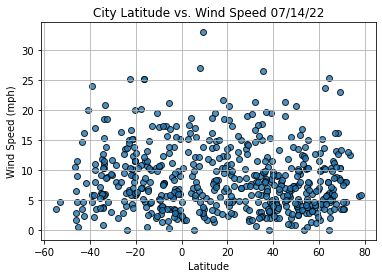

In [18]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties. Time will appear like a datetime stamp
# so should convert it to string format method: strftime()
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                       Trairi
Country                        BR
Date          2022-07-14 15:45:39
Lat                       -3.2778
Lng                      -39.2689
Max Temp                    85.77
Humidity                       57
Cloudiness                     29
Wind Speed                   13.8
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
550    False
551     True
552     True
553    False
554     True
Name: Lat, Length: 555, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2022-07-14 15:50:17,69.4541,-133.0374,39.20,81,75,23.02
1,Ponta Do Sol,PT,2022-07-14 15:48:37,32.6667,-17.1000,80.71,62,3,8.03
3,Nome,US,2022-07-14 15:50:18,64.5011,-165.4064,46.47,100,100,0.00
5,Vostok,RU,2022-07-14 15:49:00,46.4856,135.8833,58.75,93,100,5.17
6,Hamilton,US,2022-07-14 15:50:19,39.1834,-84.5333,83.62,57,20,8.05


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

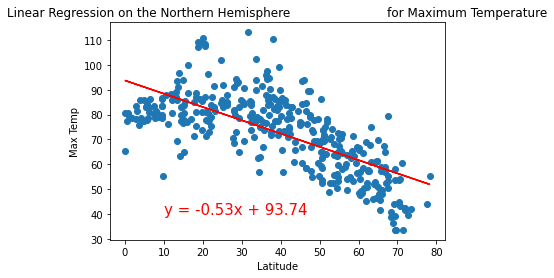

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

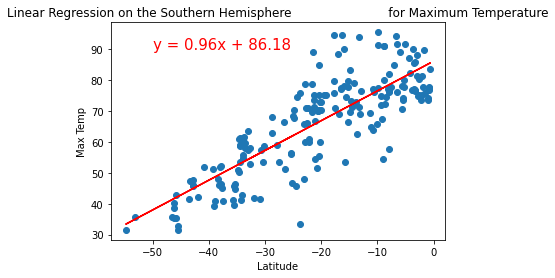

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

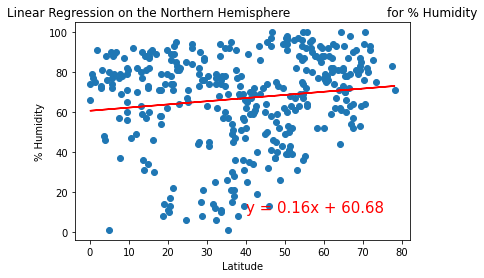

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

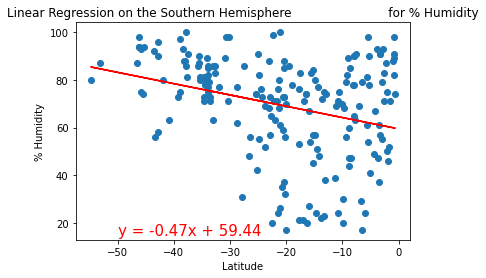

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

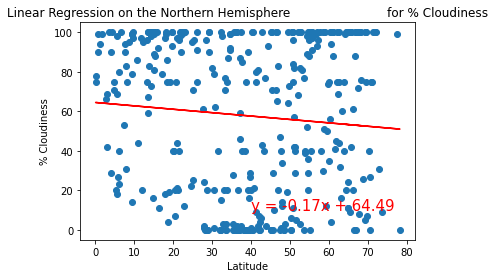

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

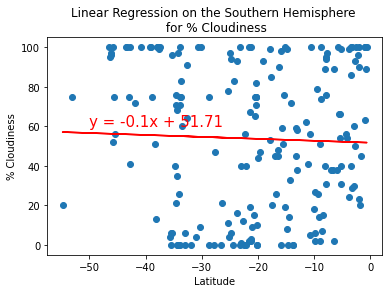

LinregressResult(slope=-0.09806022991169888, intercept=51.711966105104736, rvalue=-0.03593043058928459, pvalue=0.6170962100558828, stderr=0.1958164185299795, intercept_stderr=4.83230303103764)

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))
linregress(x_values, y_values)

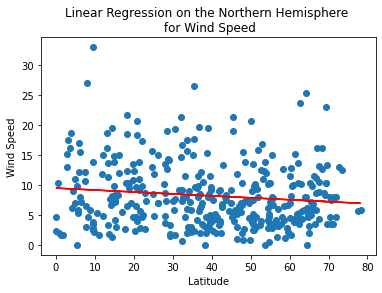

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))


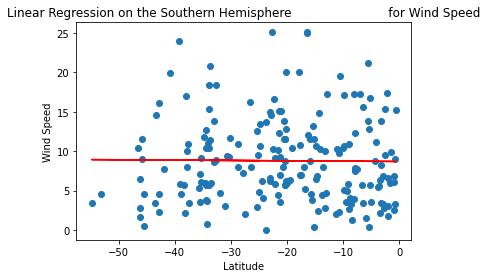

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

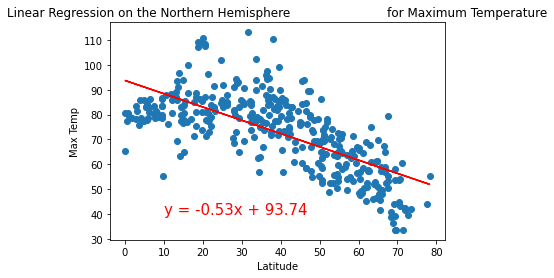

In [45]:
# Trying this one again to see if regression equation appears.
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

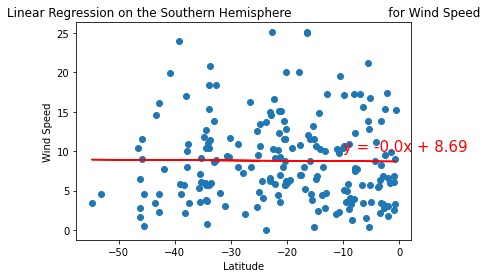

In [52]:
# Trying this one again to see if line appears. Has to do with the text coordinates needing to be changed.
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-10,10))